In [1]:
import pandas as pd
import os
import re
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_london.csv')

In [4]:
df.shape

(3870, 16)

In [5]:
df.isna().sum()

Unnamed: 0                                  0
company_name                                0
position                                    0
location                                    0
url                                         0
date_posted                                 0
Number of applicants                      799
full-time/part-time                      2467
seniority level                          3365
employees                                   0
descriptions                                0
industry                                  125
top competitive skills                      0
Hiring Trend Company Wide                2788
Hiring Trend Company Wide-Engineering    2812
Median Tenure                            2788
dtype: int64

In [6]:
df['seniority level'].value_counts()

associate    505
Name: seniority level, dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [9]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,software development engineer,156
1,android developer,152
2,ios developer,123
3,senior android engineer,67
4,android engineer,59
5,senior ios developer,44
6,senior ios engineer,43
7,ios engineer,41
8,senior software engineer,33
9,java developer,32


In [10]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [11]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile' in y) or ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'     
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [12]:
remove = df[df['new_filter']=='remove'].reset_index(drop=True)

In [13]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [14]:
df.shape

(2871, 15)

# Total Job Postings by Time Frames

In [15]:
def dates_posted_to_time_frames(x):
    if ('hour' in x) or ('minute' in x):
        return 'within 1 week'
    try:
        num = int(re.findall('\d+', x)[0])
    except TypeError:
        return np.NaN
    if 'week' in x:
        if num == 1:
            return 'within 1 week'
        elif num == 2:
            return 'Between 1 and 2 weeks'
        elif num == 3:
            return 'Between 2 and 3 weeks'
        else:
            return "More than 3 weeks" 
    else:
        return "More than 3 weeks"        
df['time_frames'] = list(map(dates_posted_to_time_frames, df['date_posted']))
# df['time_frames'].value_counts()

In [16]:
temp = pd.DataFrame(df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,1239
1,within 1 week,945
2,Between 1 and 2 weeks,399
3,Between 2 and 3 weeks,288


In [17]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

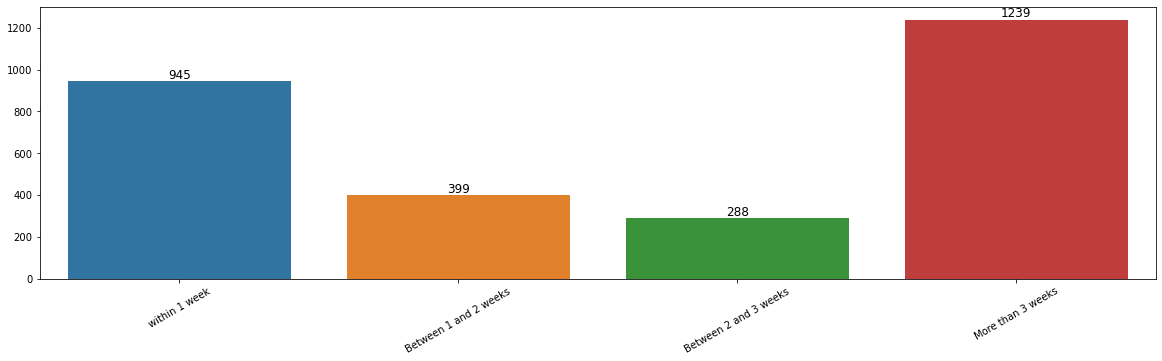

In [18]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [19]:
df_within_1_week = df[df['time_frames'] == 'within 1 week']

In [20]:
df_within_1_month = df[(df['time_frames'].isin(['within 1 week', 'Between 1 and 2 weeks', 'Between 2 and 3 weeks'])) |
                       (df['date_posted'] == '1 month ago')]

# Seniority Level Segments

junior/entry level    1648
associate/senior      1223
Name: seniority_segment_created, dtype: int64
            Seniority  number of postings
0  junior/entry level                1648
1    associate/senior                1223


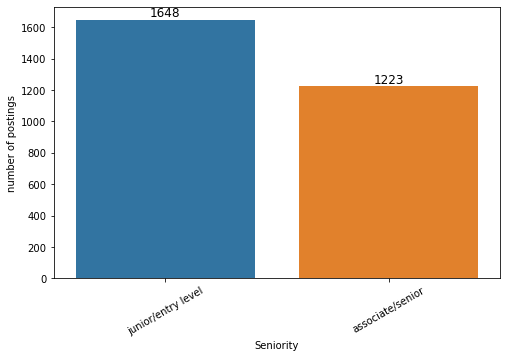

In [21]:
def segment_seniority_levels(x, y):
    if pd.isna(y):
        if ('senior' in x) or ('lead' in x) or ('sr ' in x) or ('director' in x) or ('manager' in x):
            return 'associate/senior'
        else:
            return 'junior/entry level'
    elif y == 'associate':
        return 'associate/senior'
df['seniority_segment_created'] = list(map(segment_seniority_levels, df['position'],df['seniority level']))
print(df['seniority_segment_created'].value_counts())

temp = pd.DataFrame(df['seniority_segment_created'].value_counts()).reset_index()
temp.columns =['Seniority', 'number of postings']
print(temp)

fig, ax = plt.subplots(figsize= (8,5))
ax = sns.barplot(x="Seniority", y="number of postings", data=temp)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [22]:
junior_level_df = df[df['seniority_segment_created']=='junior/entry level']
print(junior_level_df.shape)
senior_level_df = df[df['seniority_segment_created']=='associate/senior']
print(senior_level_df.shape)

(1648, 17)
(1223, 17)


# Junior Level job postings by Time Frames 

In [23]:
temp = pd.DataFrame(junior_level_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,775
1,within 1 week,478
2,Between 1 and 2 weeks,215
3,Between 2 and 3 weeks,180


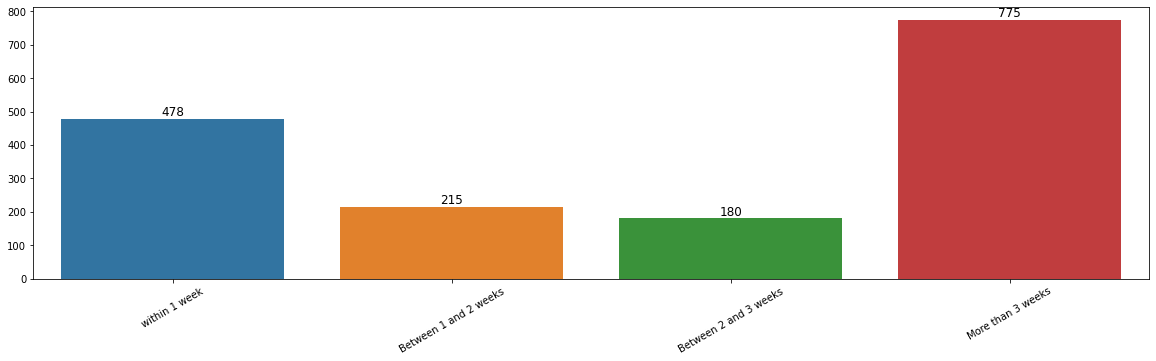

In [24]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies Hiring

In [25]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,client server,160
1,google,124
2,amazon,117
3,jefferson frank,96
4,picsart,57
5,pulselive,50
6,facebook,47
7,toptal,47
8,agoda,45
9,asos.com,38


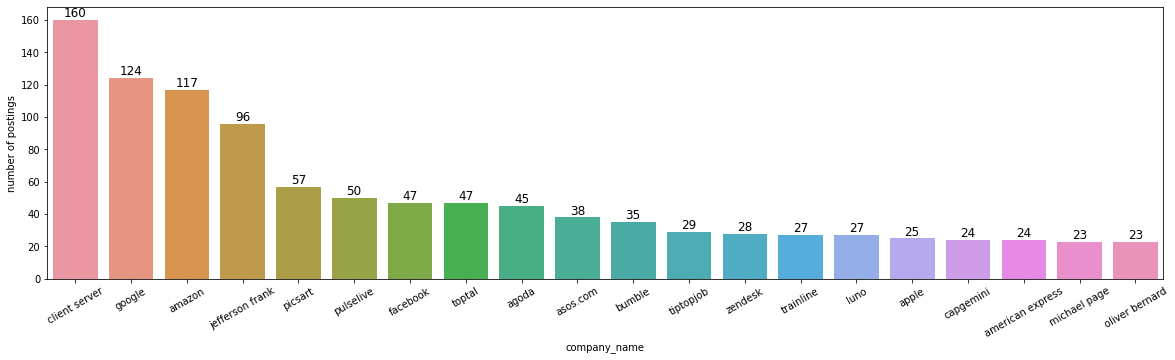

In [26]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 week

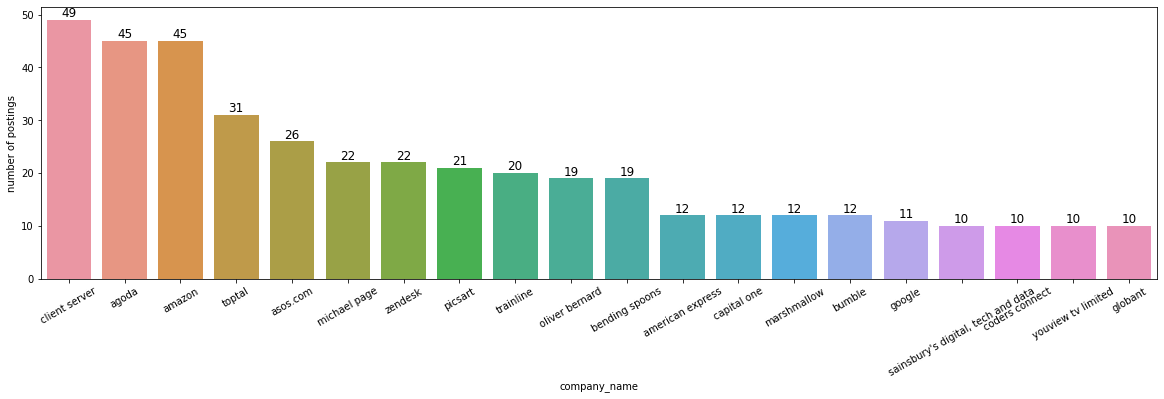

In [27]:
temp = pd.DataFrame(df_within_1_week['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 month

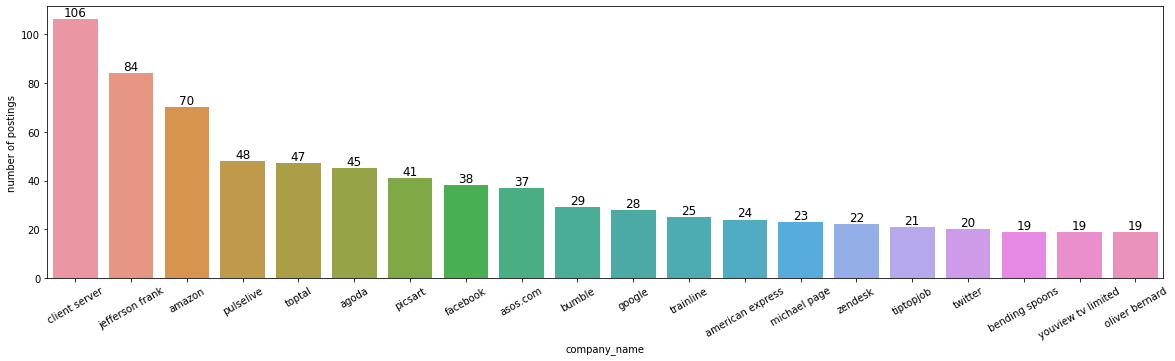

In [28]:
temp = pd.DataFrame(df_within_1_month['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies hiring only for junior positions

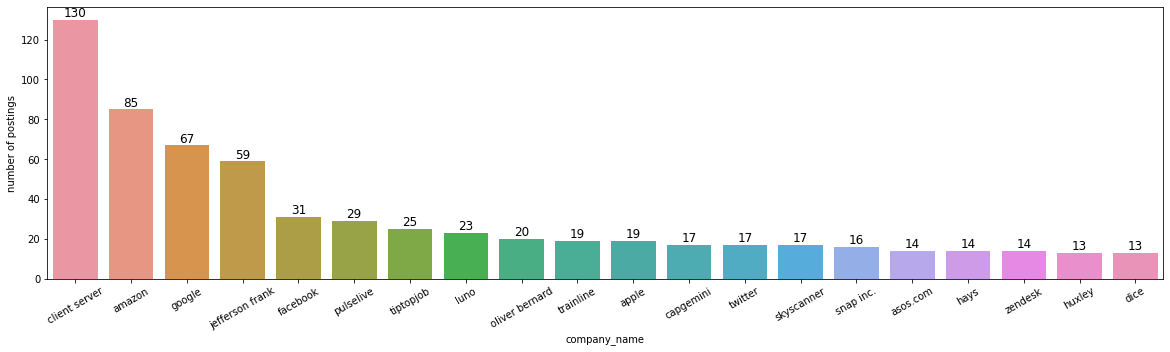

In [29]:
temp = pd.DataFrame(junior_level_df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions Overall

In [30]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,android developer,152
1,ios developer,123
2,software development engineer,72
3,senior android engineer,67
4,android engineer,59
5,senior ios developer,44
6,senior ios engineer,43
7,ios engineer,41
8,software engineer android,30
9,senior product designer,28


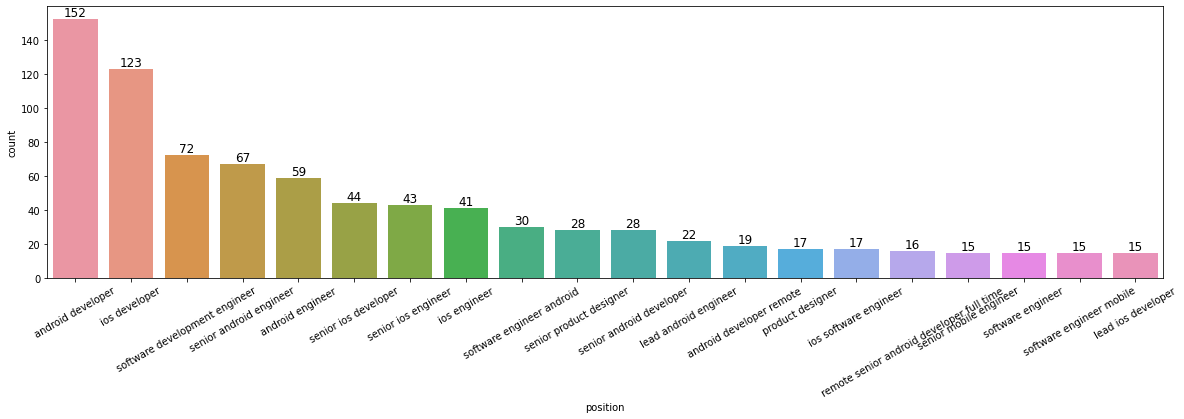

In [31]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions this week

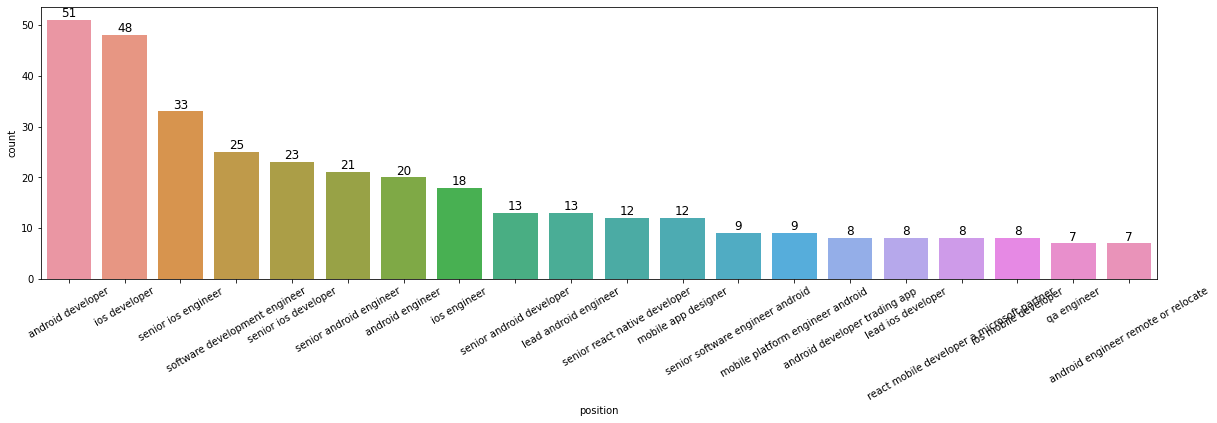

In [32]:
top_positions = pd.DataFrame(df_within_1_week['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions This Month

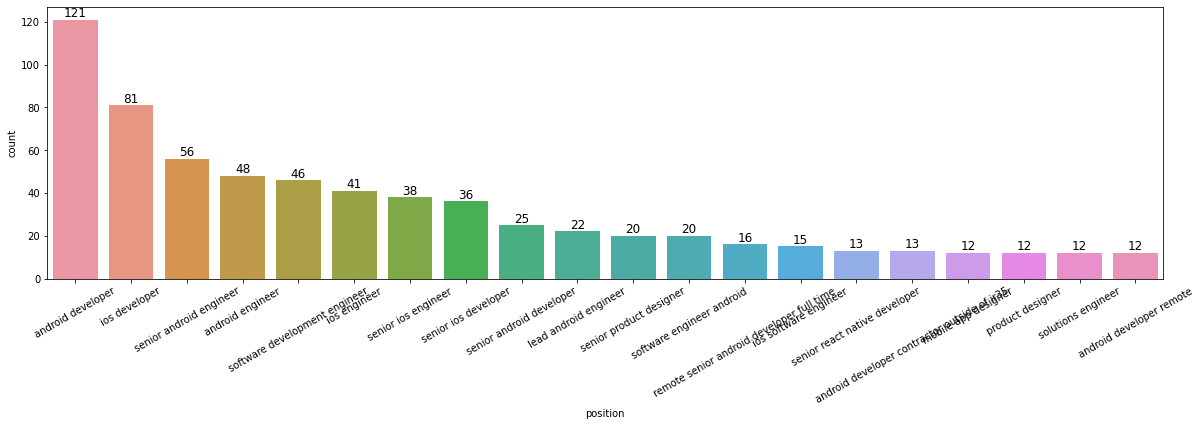

In [33]:
top_positions = pd.DataFrame(df_within_1_month['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions For Junior/Entry Level Roles

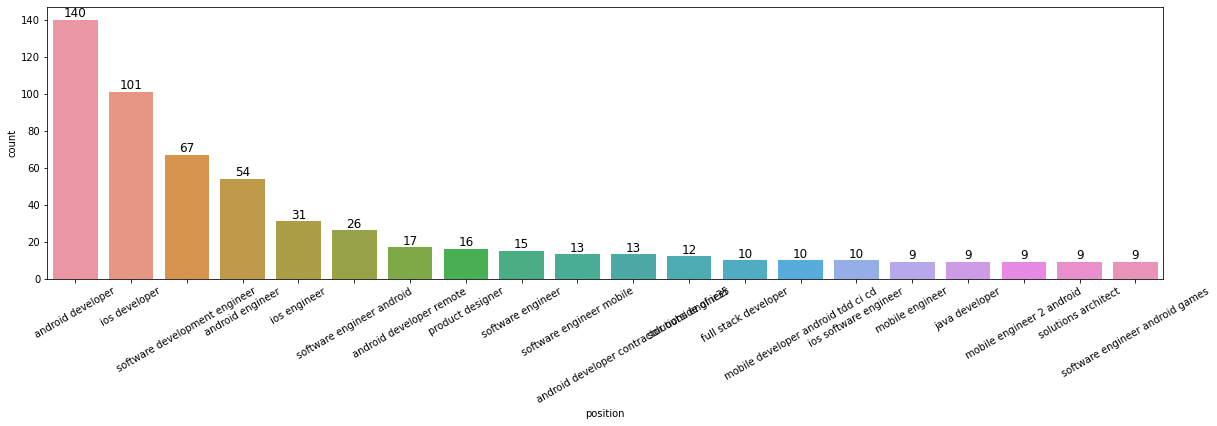

In [34]:
top_positions = pd.DataFrame(junior_level_df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [35]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [36]:
# len(top_skills)
# ios_skill = []
# for item in top_skills:
#     if 'ios' in item:
#         ios_skill.append(item)
# ios_skill

In [37]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [38]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [39]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,1158
1,android,848
2,programming language,649
3,css,580
4,javascript,485
5,ios,436
6,java,408
7,model view,380
8,object oriented programing,338
9,html,255


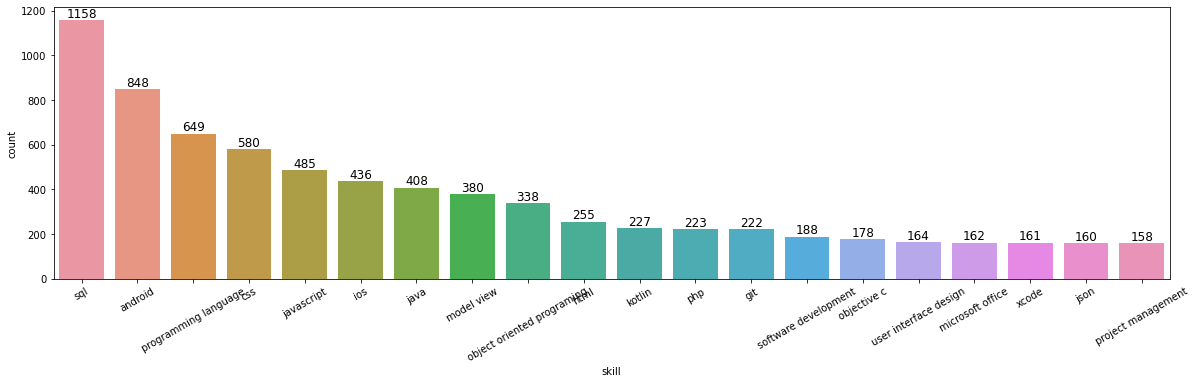

In [40]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [41]:
skills = x['skill']
skills = list(skills.values)

In [42]:
other_skills = ['swift', 'xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [43]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [44]:
import re

In [45]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [46]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [47]:
skills_count

,skill,count
0,design,2081
1,android,1920
2,unity,1790
3,ios,1748
4,engineering,1319
5,java,1233
6,git,1191
7,testing,1028
8,communication,989
9,management,940


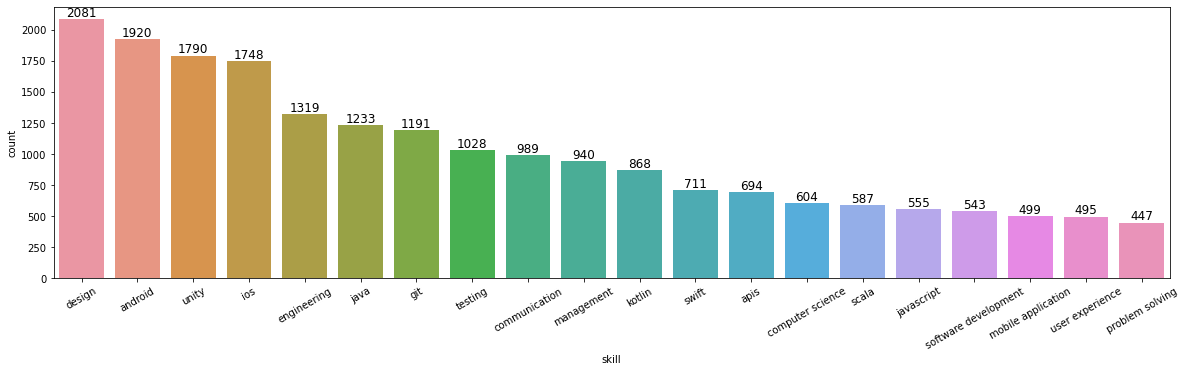

In [48]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Skills Required by Employers for Junior/Entry Level Positions 

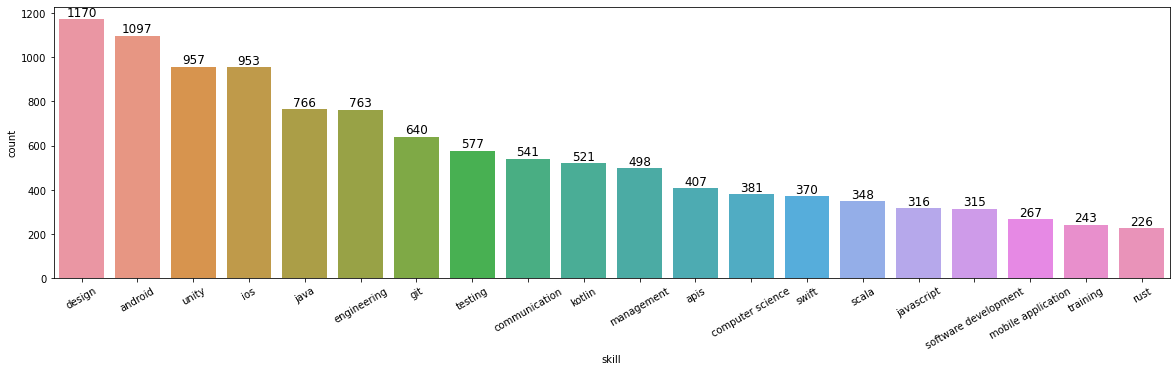

In [49]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in junior_level_df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [50]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [51]:
df['position'].value_counts()

android developer                                                            152
ios developer                                                                123
software development engineer                                                 72
senior android engineer                                                       67
android engineer                                                              59
senior ios developer                                                          44
senior ios engineer                                                           43
ios engineer                                                                  41
software engineer android                                                     30
senior product designer                                                       28
senior android developer                                                      28
lead android engineer                                                         22
android developer remote    

In [52]:
def platform_ios_android(x, y):
    if 'android' in x:
        return "android"
    elif 'kotlin' in x:
        return "android"
    elif 'ios' in x:
        return 'ios'
    elif 'swift' in x:
        return 'ios'
    elif ('android' in y) and ('ios' not in y):
        return 'android'
    elif ('ios' in y) and ('android' not in y):
        return 'ios'
    elif ('swift' in y) and ('kotlin' not in y) and ('android' not in y):
        return 'ios'
    elif ('kotlin' in y) and ('swift' not in y) and ('ios' not in y):
        return 'android'
    else:
        return 'not specified'     
df['platform'] = list(map(platform_ios_android, df['position'], df['descriptions']))

In [53]:
df['platform'].value_counts()

not specified    1213
android          1001
ios               657
Name: platform, dtype: int64

# iOS Analysis

In [54]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(657, 18)

In [55]:
# ios_df.head()

In [56]:
ios_junior_df = df[(df['platform']=='ios') & (df['seniority_segment_created']=='junior/entry level')]
ios_junior_df.shape

(347, 18)

In [57]:
# ios_junior_df.head()

# IOS JOBS BY TIMEFRAMES

In [58]:
temp = pd.DataFrame(ios_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,within 1 week,262
1,More than 3 weeks,260
2,Between 1 and 2 weeks,92
3,Between 2 and 3 weeks,43


In [59]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

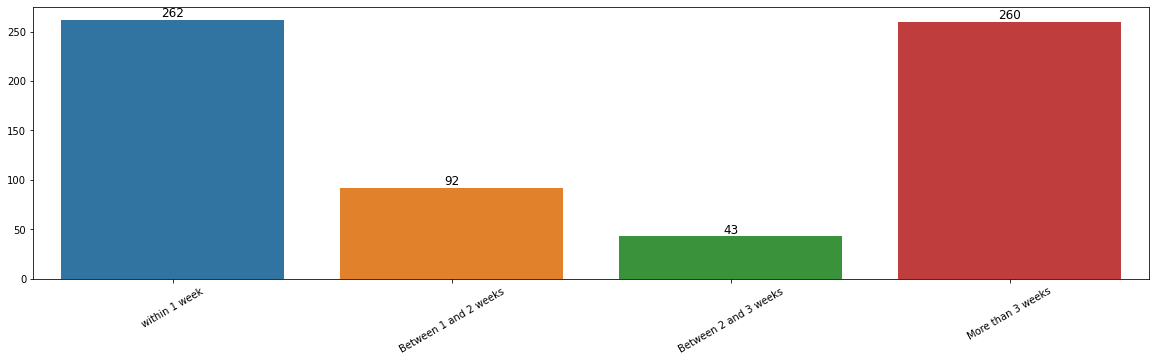

In [60]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL IOS JOBS BY TIMEFRAMES

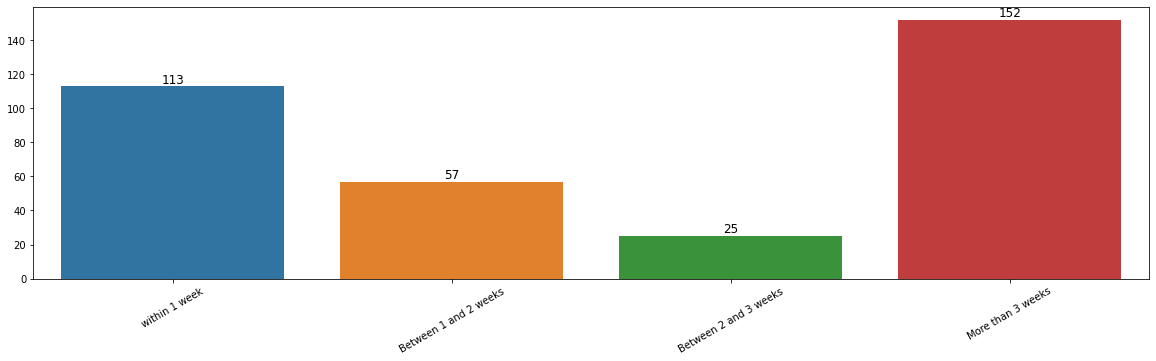

In [61]:
temp = pd.DataFrame(ios_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# SKILLS

In [62]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,608
1,design,465
2,swift,443
3,unity,405
4,engineering,273
5,git,267
6,testing,235
7,objective c,226
8,communication,202
9,apis,186


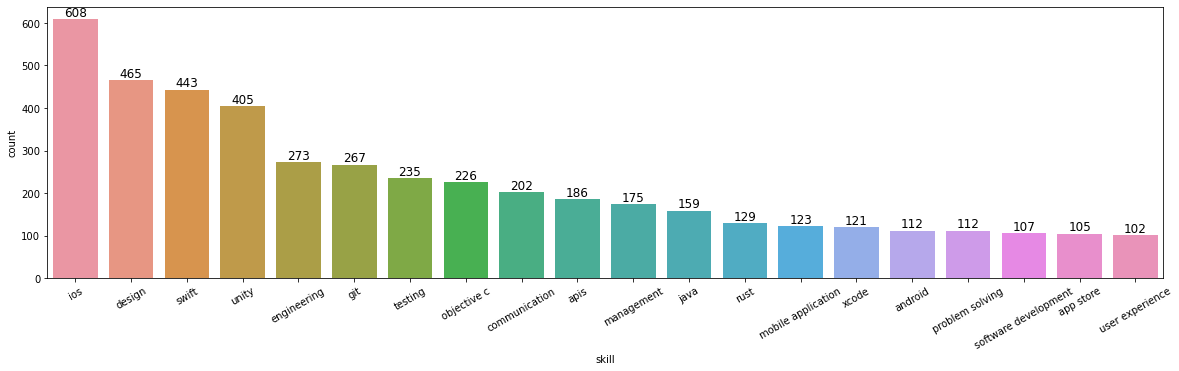

In [63]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

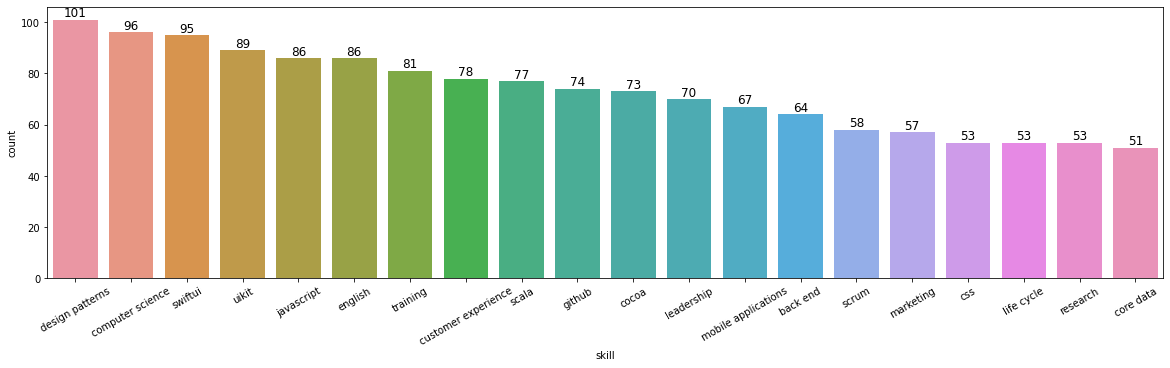

In [64]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL SKILLS 

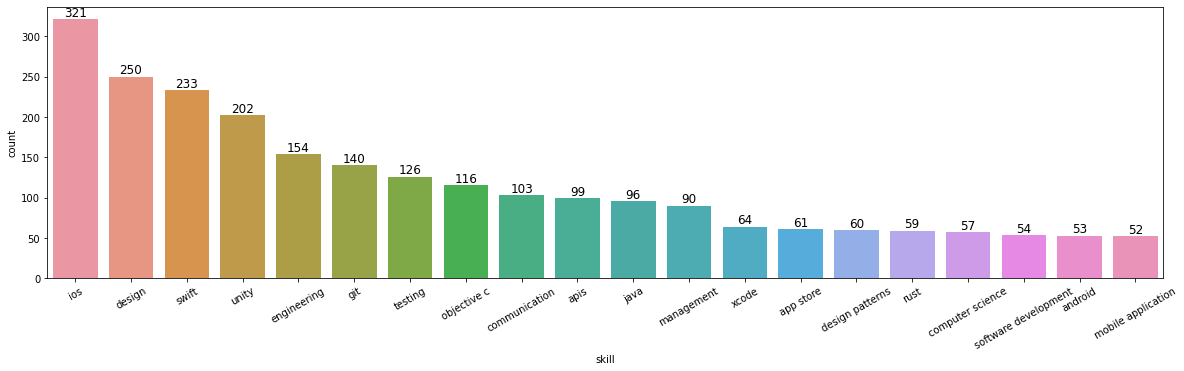

In [65]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [66]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,client server,26
1,apple,24
2,jefferson frank,20
3,amazon,16
4,tiptopjob,16
5,pulselive,15
6,king,14
7,facebook,12
8,bending spoons,11
9,nutmeg,11


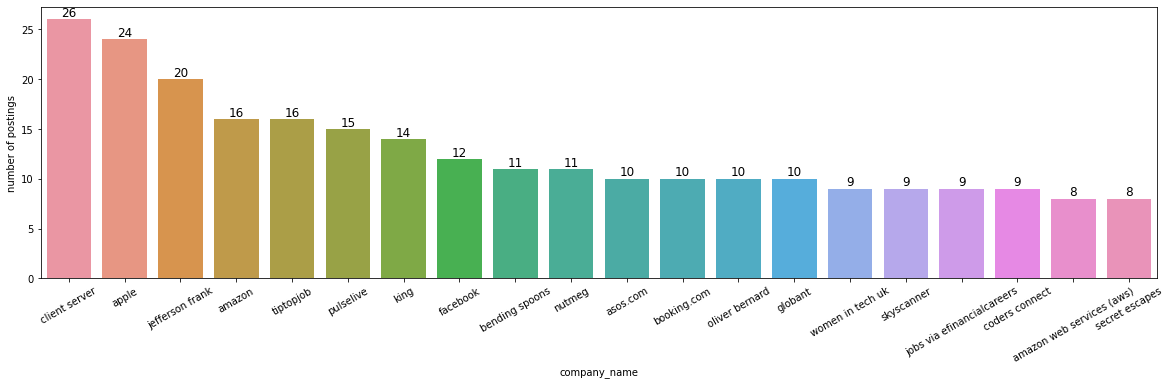

In [67]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP IOS JOB COMPANIES FOR JUNIOR POSITIONS 

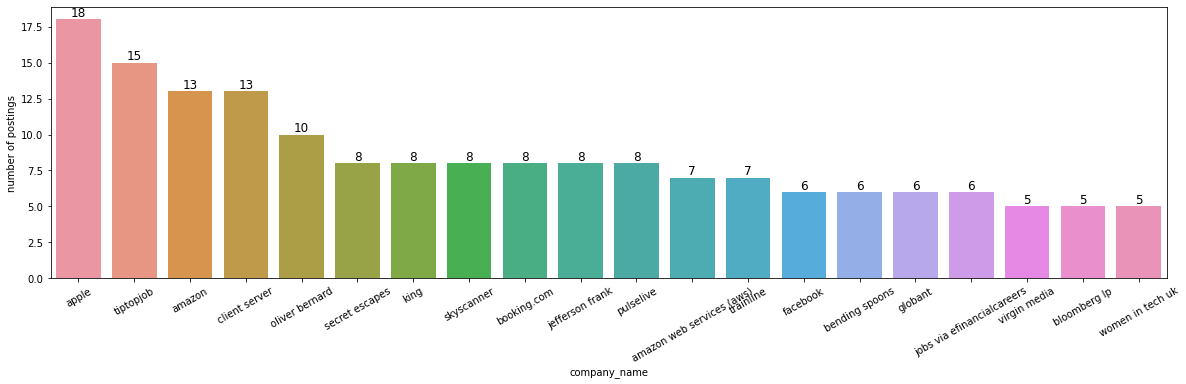

In [68]:
top_companies_ios = pd.DataFrame(ios_junior_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [69]:
android_df = df[df['platform']=='android']
android_df.shape

(1001, 18)

In [70]:
android_junior_df = df[(df['platform']=='android') & (df['seniority_segment_created']=='junior/entry level')]
android_junior_df.shape

(626, 18)

# ANDROID JOBS BY TIMEFRAME

In [71]:
temp = pd.DataFrame(android_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,445
1,within 1 week,308
2,Between 1 and 2 weeks,126
3,Between 2 and 3 weeks,122


In [72]:
a = temp['time_frames'][0]
b = temp['time_frames'][2]
c = temp['time_frames'][3]
d = temp['time_frames'][1]
x = [a,b, c, d]
a = temp['number of postings'][0]
b = temp['number of postings'][2]
c = temp['number of postings'][3]
d = temp['number of postings'][1]
y = [a,b,c,d]

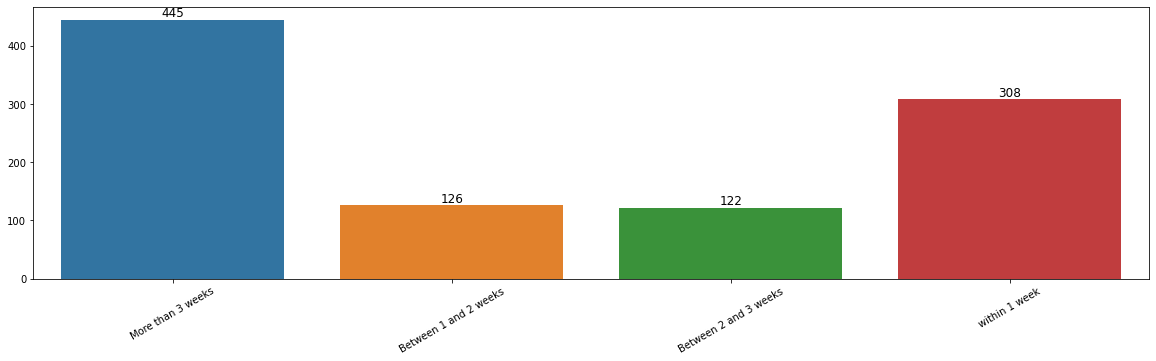

In [73]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL ANDROID JOBS BY TIME FRAME

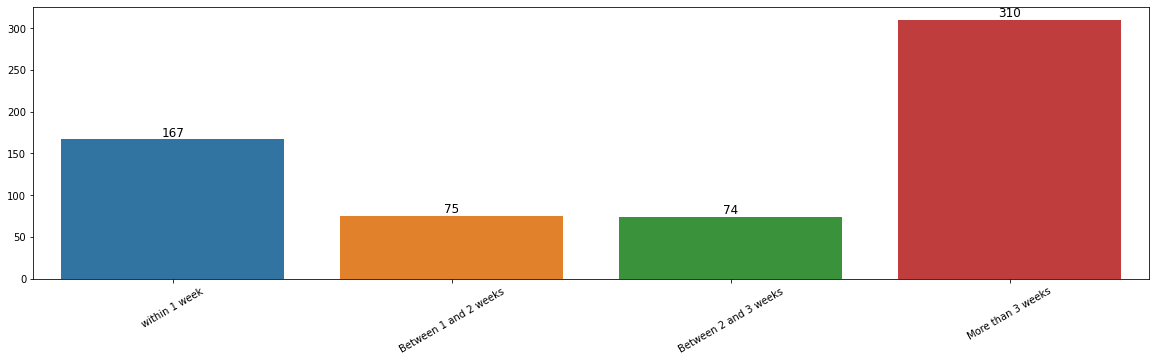

In [74]:
temp = pd.DataFrame(android_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS 

In [75]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android.head(20)

,skill,count
0,android,874
1,design,753
2,kotlin,666
3,unity,621
4,java,595
5,engineering,505
6,git,389
7,testing,338
8,management,318
9,communication,298


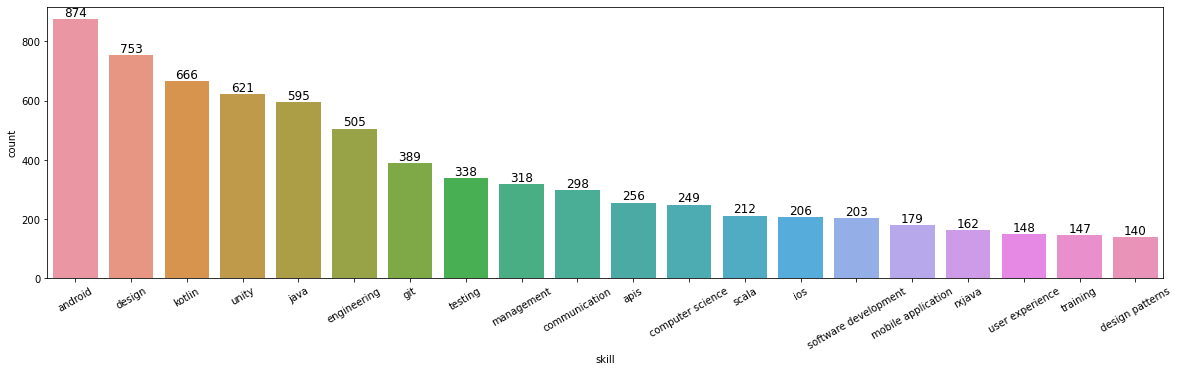

In [76]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS FOR JUNIOR POSITIONS 

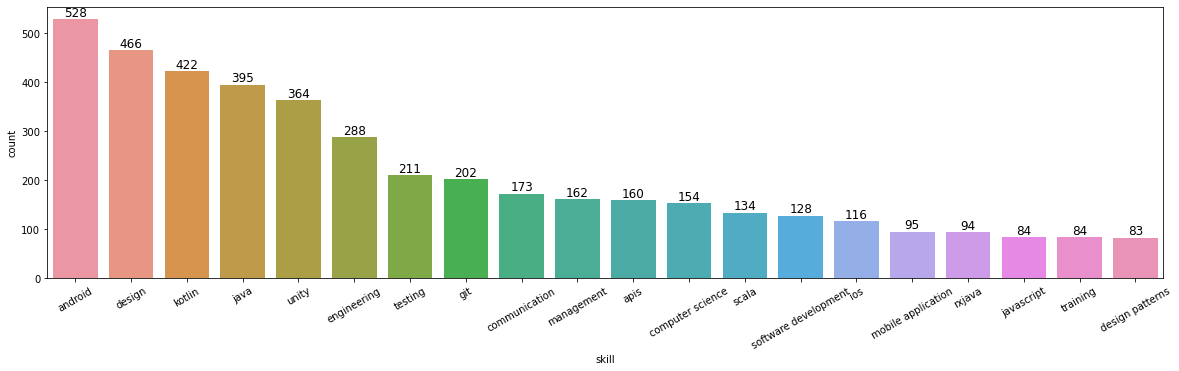

In [77]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [78]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,google,114
1,client server,89
2,jefferson frank,50
3,amazon,43
4,pulselive,27
5,asos.com,23
6,youview tv limited,20
7,toptal,20
8,zendesk,18
9,twitter,18


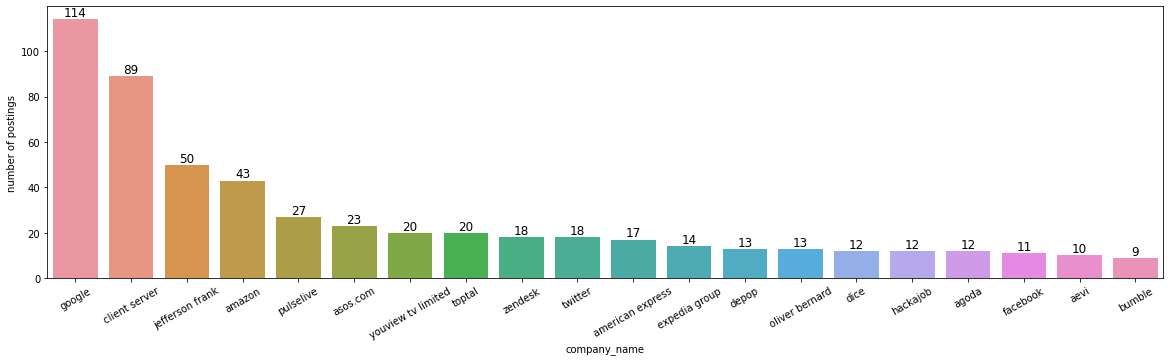

In [79]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP COMPANIES ANDROID FOR JUNIOR POSITIONS 

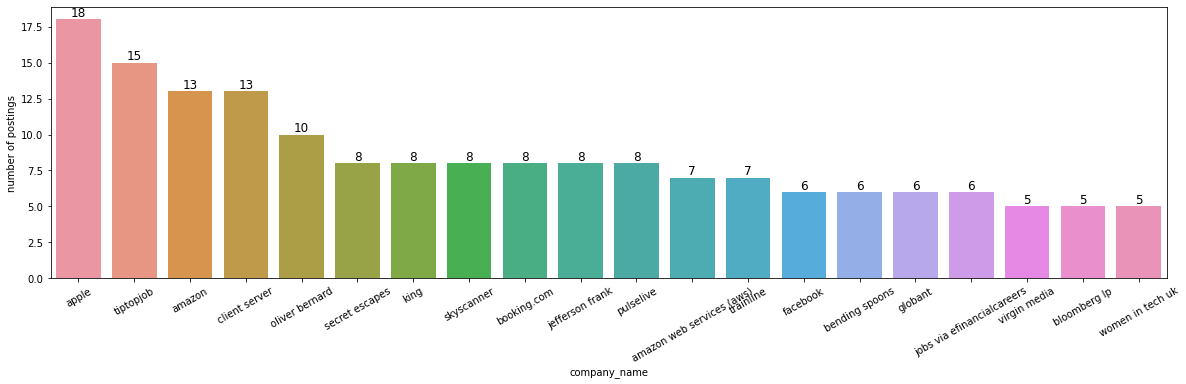

In [80]:
top_companies_android = pd.DataFrame(android_junior_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()